In [1]:
import pandas as pd
confirmed_df = pd.read_csv("./KaggleData/covid19/time_series_covid_19_confirmed.csv")
deaths_df = pd.read_csv("./KaggleData/covid19/time_series_covid_19_deaths.csv")
recovered_df = pd.read_csv("./KaggleData/covid19/time_series_covid_19_recovered.csv")

In [2]:
print(confirmed_df.shape)
print(deaths_df.shape)
print(recovered_df.shape)

(276, 498)
(276, 498)
(261, 498)


In [3]:
# 대한민국 데이터 추출
idx_korea = (confirmed_df['Country/Region'] == 'Korea, South')
confirmed_korea_df = confirmed_df[idx_korea]

In [4]:
print(confirmed_korea_df.shape)
confirmed_korea_df

(1, 498)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,134678,135344,135929,136467,136983,137682,138311,138898,139431,139910


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'text.color': "black",
                    'axes.labelcolor': "white",
                     'xtick.color': "white",
                     'ytick.color': "white"
                     })
confirmed_korea_np = np.array(confirmed_korea_df)   # numpy 배열로 변환
confirmed_korea_np = confirmed_korea_np[:, 4:]  # 2차원 배열 [행전체, 열 5번째부터]
confirmed_korea_np.shape

(1, 494)

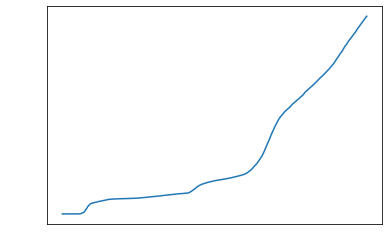

In [6]:
plt.plot(confirmed_korea_np[0, :])
plt.show()

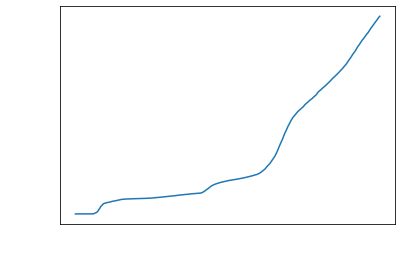

In [7]:
plt.plot(confirmed_korea_np[0, :])   # 확진자 그래프 그리기
label_x = confirmed_korea_df.columns.values[4:] # Data Frame에서 인덱스 가져오기 날짜

sel_ids = range(0, len(label_x), 80)   # 눈금을 표시할 위치 선택 0~494, 80씩 증가
plt.xticks(sel_ids, labels=label_x[sel_ids])    # 눈금 표시
plt.ylabel("Population")
plt.xlabel("Date")
plt.show()

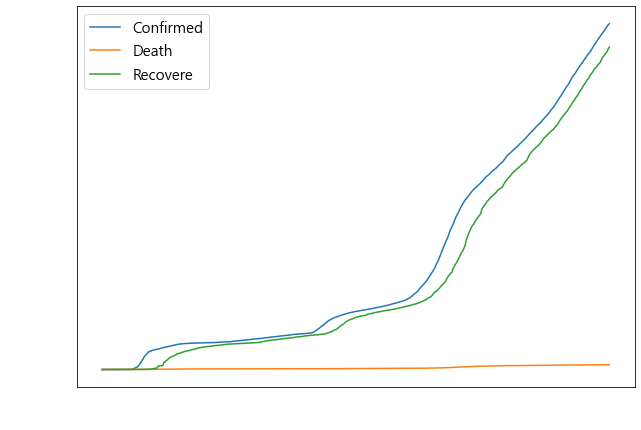

In [8]:
# 누적 사망자 수 가져오기
idx_korea = (deaths_df['Country/Region'] == 'Korea, South')
deaths_korea_df = deaths_df[idx_korea]
deaths_korea_np = np.array(deaths_korea_df)   # numpy 배열로 변환
deaths_korea_np = deaths_korea_np[:, 4:]  # 2차원 배열 [행전체, 열 5번째부터]

# 누적 회복자 수 가져오기
idx_korea = (recovered_df['Country/Region'] == 'Korea, South')
recovered_korea_df = recovered_df[idx_korea]
recovered_korea_np = np.array(recovered_korea_df)   # numpy 배열로 변환
recovered_korea_np = recovered_korea_np[:, 4:]  # 2차원 배열 [행전체, 열 5번째부터]

plt.figure(figsize=(10, 7))
plt.plot(confirmed_korea_np[0, :])
plt.plot(deaths_korea_np[0, :])
plt.plot(recovered_korea_np[0, :])

label_x = confirmed_korea_df.columns.values[4:] # Data Frame에서 인덱스 가져오기 날짜

sel_ids = range(0, len(label_x), 80)   # 눈금을 표시할 위치 선택 0~494, 80씩 증가
plt.xticks(sel_ids, labels=label_x[sel_ids], fontsize=15)    # 눈금 표시
plt.yticks(fontsize=15)
plt.legend(['Confirmed', 'Death', 'Recovere'], fontsize=15)
plt.ylabel("Population")
plt.xlabel("Date")
plt.show()

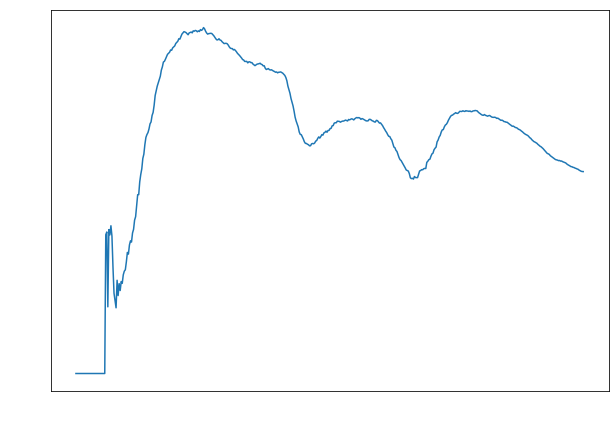

In [9]:
plt.figure(figsize=(10,7))
recovered2confirmed_ratio = deaths_korea_np[0,:] / confirmed_korea_np[0,:]

plt.plot(recovered2confirmed_ratio)             # 확진자 그래프 그리기

label_x = confirmed_korea_df.columns.values[4:] # DataFrame에서 인덱스 가져오기

sel_ids = range(0, len(label_x), 100)           # 눈금을 표시할 위치 선택
plt.xticks(sel_ids, labels=label_x[sel_ids], fontsize=15)   # x축 눈금 표시
plt.yticks(fontsize=15)                                     # y축 눈금 표시
plt.show()

In [10]:
idx_max = np.argmax(recovered2confirmed_ratio)

print(f'사망자/확진자 비율이 최대인 일자는: {label_x[idx_max]} 이며')
print(f'해당 일자의 값은 {recovered2confirmed_ratio[idx_max]:.3f}입니다.')

사망자/확진자 비율이 최대인 일자는: 5/25/20 이며
해당 일자의 값은 0.024입니다.
